In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

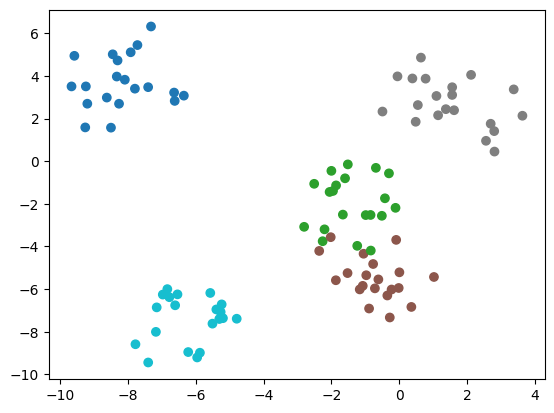

In [60]:
from sklearn.datasets import make_blobs

data, labels = make_blobs(n_samples=100, n_features=2, centers=5)

plt.scatter(data[:,0], data[:,1], c=labels, cmap="tab10")

In [32]:
def knearest(data, labels, x, k):
    dist = np.zeros((len(data), 2))
    for i in range(len(data)):
        dist[i, 0] = np.linalg.norm(data[i] - x)
        dist[i, 1] = labels[i]
    
    nearest = dist[dist[:, 0].argsort()][:k]
    return stats.mode(nearest[:, 1])[0]


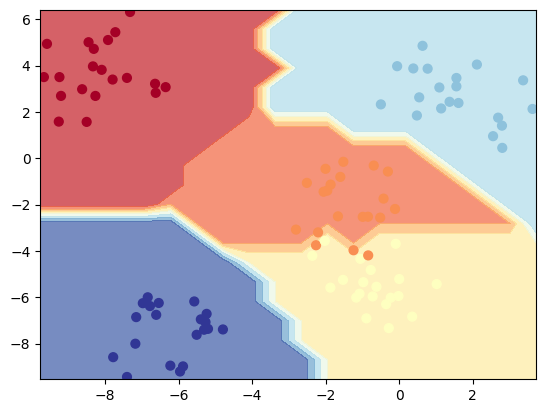

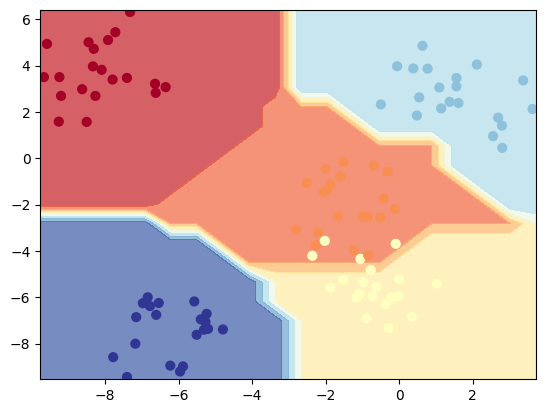

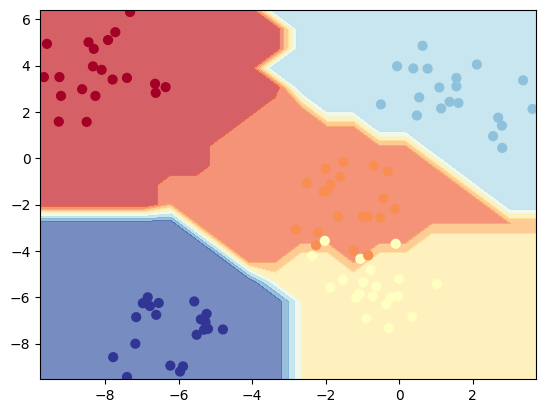

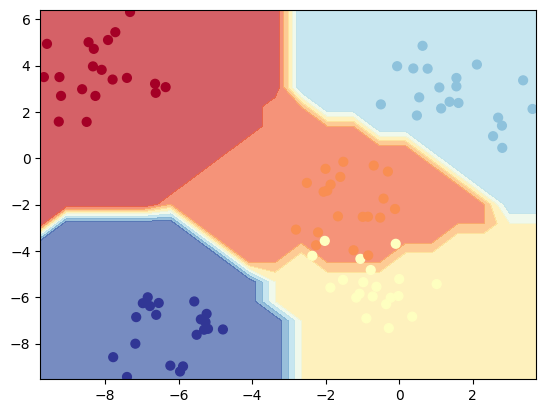

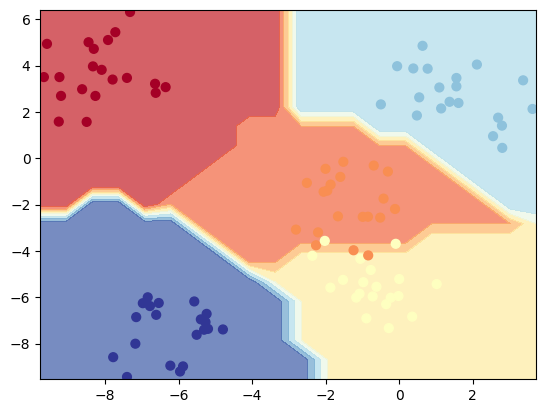

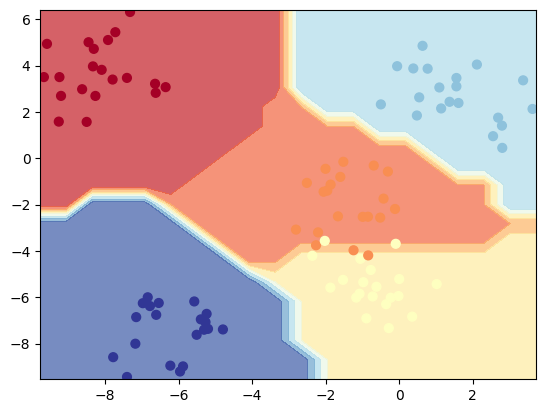

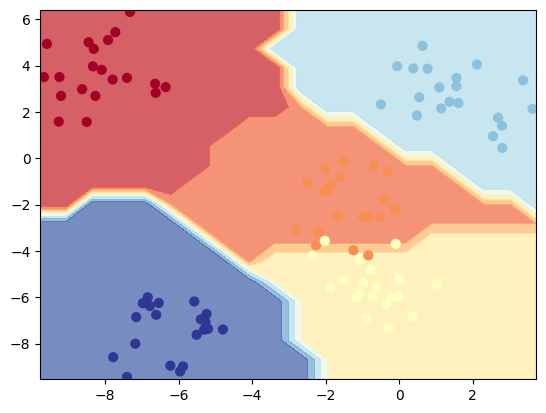

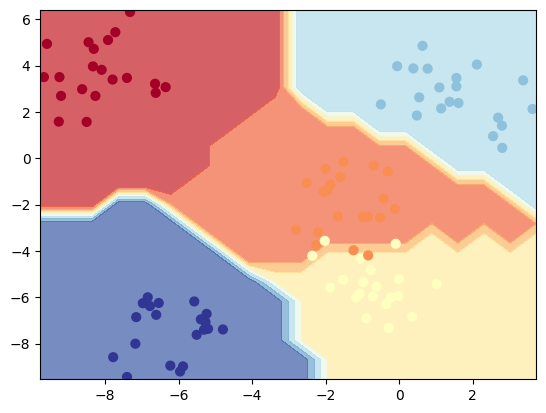

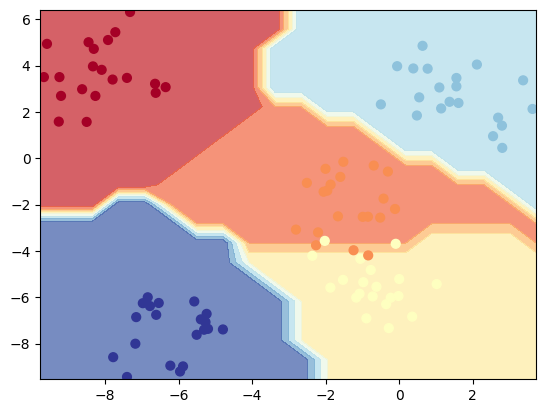

In [79]:
# https://psrivasin.medium.com/plotting-decision-boundaries-using-numpy-and-matplotlib-f5613d8acd19
for k in range(1, 10):
    x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
    y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min,x_max, 20), np.linspace(y_min, y_max, 20))

    x_in = np.c_[xx.ravel(), yy.ravel()]

    y_pred = np.array([knearest(data, labels, x, k) for x in x_in])
    y_pred = y_pred.reshape(xx.shape)

    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )
    plt.scatter(data[:,0], data[:, 1], c=labels, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.show()